<a href="https://colab.research.google.com/github/gustavoramos82/Identifica-o-de-Flor/blob/main/Identifica%C3%A7%C3%A3o_das_flores_extr_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Flores - Extração de Caracteristicas

Neste projeto, apartir de dataset do kaggle (que pode ser acessado [aqui](https://www.kaggle.com/datasets/nadyana/flowers)), será feito a nalise de imagem para classificar de acordo com a espécie da flor. Primerio será utilizado a extração de caracteristicas depois fine-tunning.

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tensorflow import keras
from tensorflow.keras.applications import vgg19,resnet50,InceptionResNetV2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Pegando o diretorio da pasta de cada classifcador
bellflower = os.listdir('/content/drive/MyDrive/Datasets/flowers/bellflower')
daisy = os.listdir('/content/drive/MyDrive/Datasets/flowers/daisy')
dandelion = os.listdir('/content/drive/MyDrive/Datasets/flowers/dandelion')


Text(0, 0.5, 'Espécie')

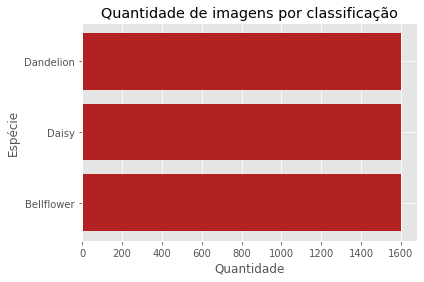

In [ ]:
quantidade = [len(bellflower),len(daisy),len(dandelion)]
nome = ['Bellflower', 'Daisy','Dandelion']

plt.style.use('ggplot')
plt.title('Quantidade de imagens por classificação')
plt.barh(nome,quantidade,color='firebrick')
plt.xlabel('Quantidade')
plt.ylabel('Espécie')

Podemos ver que que cada uma tem 1600 imagens, ou seja, este dataset é balanceado acerca da quantidade de labels.

In [ ]:
# fazendo a extração das imagens
x = []
y = []
img_w, img_h = 224, 224

In [ ]:
for i in bellflower:
  image = Image.open(f'/content/drive/MyDrive/Datasets/flowers/bellflower/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(0)

In [ ]:
for i in daisy:
  image = Image.open(f'/content/drive/MyDrive/Datasets/flowers/daisy/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(1)

In [ ]:
for i in dandelion:
  image = Image.open(f'/content/drive/MyDrive/Datasets/flowers/dandelion/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(2)

In [ ]:
x = np.asarray(x)
x = x.astype('float32')
x /= 255
y = np.asarray(y)

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
# model = vgg19.VGG19(include_top=True, weights='imagenet', input_shape=(224, 224, 3),classes=1000, classifier_activation='softmax')
# model = resnet50.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True,classifier_activation='softmax')
model = InceptionResNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False,classifier_activation='relu')
model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output)

In [ ]:
prediction = np.array(model.predict(x_treino))
Xtrain = np.reshape(prediction, (prediction.shape[0], 
         np.prod(prediction.shape[1:])))

In [ ]:
prediction = np.array(model.predict(x_teste))
Xtest = np.reshape(prediction, (prediction.shape[0], 
         np.prod(prediction.shape[1:])))

In [ ]:
acc = []
pre = []
rec = []

In [ ]:
rid = RidgeClassifier()
rid.fit(Xtrain,y_treino)
y_rid = rid.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.10675e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


In [ ]:
print('Acuracia',accuracy_score(y_teste,y_rid))
acc.append(accuracy_score(y_teste,y_rid))
print('Precisão',precision_score(y_teste,y_rid,average='macro'))
pre.append(precision_score(y_teste,y_rid,average='macro'))
print('Recall',recall_score(y_teste,y_rid,average='macro'))
rec.append(recall_score(y_teste,y_rid,average='macro'))

Acuracia 0.946875
Precisão 0.9467640044140279
Recall 0.9468031636688353


In [ ]:
# Aplicando naive bayes
naive = GaussianNB()
naive.fit(Xtrain,y_treino)
y_na_pred = naive.predict(Xtest)

In [ ]:
print('Acuracia',accuracy_score(y_teste,y_na_pred))
acc.append(accuracy_score(y_teste,y_na_pred))
print('Precisão',precision_score(y_teste,y_na_pred,average='macro'))
pre.append(precision_score(y_teste,y_na_pred,average='macro'))
print('Recall',recall_score(y_teste,y_na_pred,average='macro'))
rec.append(recall_score(y_teste,y_na_pred,average='macro'))

Acuracia 0.8614583333333333
Precisão 0.8635403472118394
Recall 0.8613113917591529


In [ ]:
# Aplicando Árvore de Decisão
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(Xtrain,y_treino)
y_tree_pred = tree.predict(Xtest)

In [ ]:
print('Acuracia',accuracy_score(y_teste,y_tree_pred))
acc.append(accuracy_score(y_teste,y_tree_pred))
print('Precisão',precision_score(y_teste,y_tree_pred,average='macro'))
pre.append(precision_score(y_teste,y_tree_pred,average='macro'))
print('Recall',recall_score(y_teste,y_tree_pred,average='macro'))
rec.append(recall_score(y_teste,y_tree_pred,average='macro'))

Acuracia 0.840625
Precisão 0.840995782245583
Recall 0.841470850873836


In [ ]:
# Usando KNN
knn = KNeighborsClassifier()
knn.fit(Xtrain,y_treino)
y_knn = knn.predict(Xtest)

In [ ]:
print('Acuracia',accuracy_score(y_teste,y_knn))
acc.append(accuracy_score(y_teste,y_knn))
print('Precisão',precision_score(y_teste,y_knn,average='macro'))
pre.append(precision_score(y_teste,y_knn,average='macro'))
print('Recall',recall_score(y_teste,y_knn,average='macro'))
rec.append(recall_score(y_teste,y_knn,average='macro'))

Acuracia 0.9020833333333333
Precisão 0.9082543499697889
Recall 0.9040477101671133


In [ ]:
# Aplicando Random Forest
rf = RandomForestClassifier(criterion='entropy')
rf.fit(Xtrain,y_treino)
y_rf = rf.predict(Xtest)

In [ ]:
print('Acuracia',accuracy_score(y_teste,y_rf))
acc.append(accuracy_score(y_teste,y_rf))
print('Precisão',precision_score(y_teste,y_rf,average='macro'))
pre.append(precision_score(y_teste,y_rf,average='macro'))
print('Recall',recall_score(y_teste,y_rf,average='macro'))
rec.append(recall_score(y_teste,y_rf,average='macro'))

Acuracia 0.928125
Precisão 0.9300697760420104
Recall 0.9277803291236127


In [ ]:
# Svm com kernel linear
svm = SVC()
svm.fit(Xtrain,y_treino)
y_svm = svm.predict(Xtest)

In [ ]:
print('Acuracia',accuracy_score(y_teste,y_svm))
acc.append(accuracy_score(y_teste,y_svm))
print('Precisão',precision_score(y_teste,y_svm,average='macro'))
pre.append(precision_score(y_teste,y_svm,average='macro'))
print('Recall',recall_score(y_teste,y_svm,average='macro'))
rec.append(recall_score(y_teste,y_svm,average='macro'))

Acuracia 0.9677083333333333
Precisão 0.9682362560802115
Recall 0.967553259344304


In [ ]:
ex = ExtraTreesClassifier()
ex.fit(Xtrain,y_treino)
y_ex = ex.predict(Xtest)

In [ ]:
print('Acuracia',accuracy_score(y_teste,y_ex))
acc.append(accuracy_score(y_teste,y_ex))
print('Precisão',precision_score(y_teste,y_ex,average='macro'))
pre.append(precision_score(y_teste,y_ex,average='macro'))
print('Recall',recall_score(y_teste,y_ex,average='macro'))
rec.append(recall_score(y_teste,y_ex,average='macro'))

Acuracia 0.93125
Precisão 0.9337301587301589
Recall 0.9306556958795765


In [ ]:
modelo = ['RidgeClassifier()','GaussianNB()','DecisionTreeClassifier(criterion=entropy)','KNeighborsClassifier()',
          'RandomForestClassifier(criterion=entropy)','SVC()','ExtraTreesClassifier()']

In [ ]:
metrica = {'Modelo':modelo,'Acuracia':acc,'Precisão':pre,'Recall':rec}
df_metrica = pd.DataFrame(metrica)

In [ ]:
df_metrica

,Modelo,Acuracia,Precisão,Recall
0,RidgeClassifier(),0.946875,0.946764,0.946803
1,GaussianNB(),0.861458,0.863540,0.861311
2,DecisionTreeClassifier(criterion=entropy),0.840625,0.840996,0.841471
3,KNeighborsClassifier(),0.902083,0.908254,0.904048
4,RandomForestClassifier(criterion=entropy),0.928125,0.930070,0.927780
5,SVC(),0.967708,0.968236,0.967553
6,ExtraTreesClassifier(),0.931250,0.933730,0.930656


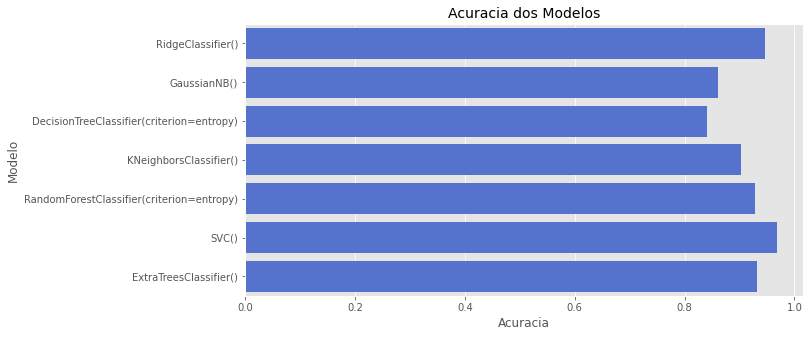

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Acuracia dos Modelos',fontsize=14)
sns.barplot(y='Modelo',x='Acuracia',data=df_metrica,color='royalblue')

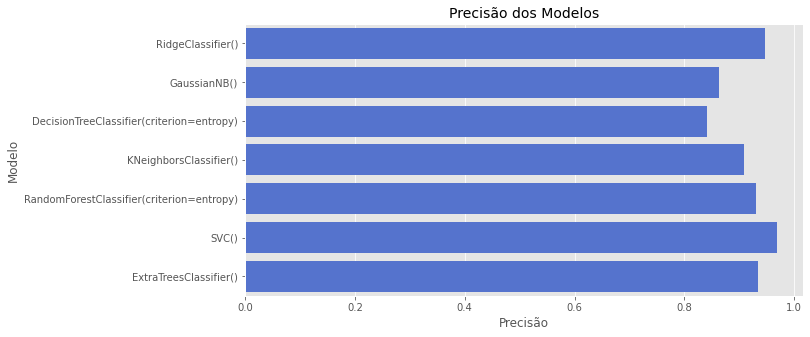

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Precisão dos Modelos',fontsize=14)
sns.barplot(y='Modelo',x='Precisão',data=df_metrica,color='royalblue')

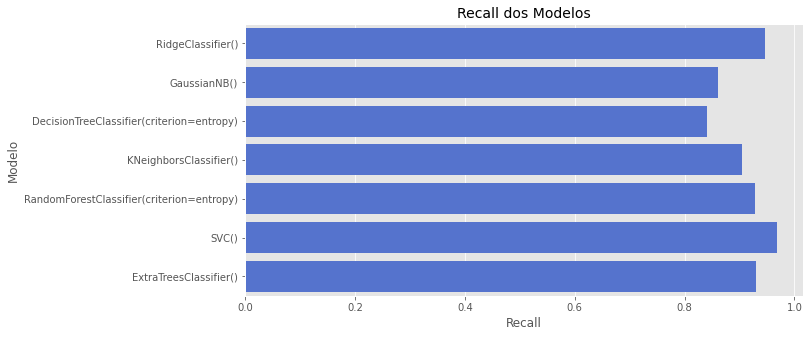

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Recall dos Modelos',fontsize=14)
sns.barplot(y='Modelo',x='Recall',data=df_metrica,color='royalblue')

In [ ]:
parametros = {'C':np.arange(0.1,1.1,0.1),'gamma':['scale','auto'],'shrinking':[True,False]}

In [ ]:
grid = GridSearchCV(SVC(),param_grid=parametros).fit(Xtrain,y_treino)